In [57]:
#import libraries
from sklearn.datasets import load_iris
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd 

# Load the Iris dataset directly from Seaborn
iris = sns.load_dataset("iris")
print(iris)

     sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]


#1) What is the median petal length for each iris species?

['setosa' 'versicolor' 'virginica']


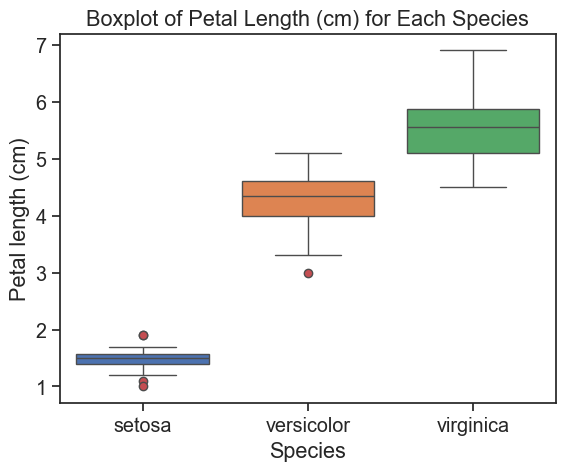

species
setosa        1.50
versicolor    4.35
virginica     5.55
Name: petal_length, dtype: float64


In [60]:
#find number of iris species
species_count = iris['species'].unique()
print(species_count)

#set theme for visualization
sns.set_theme(context = 'notebook', style = 'ticks', palette = 'deep', font = 'sans-serif', font_scale = 1.3, color_codes = True, rc = None)

#create boxplot to visualize the median petal length for each species (the horizontal line represents median), the red circle represents outliers
sns.boxplot(x = 'species', y = 'petal_length', data = iris, hue = 'species',
            saturation = 1.0, flierprops={"markerfacecolor": "r"})

#add labels to graph
plt.xlabel('Species')
plt.ylabel('Petal length (cm)')
plt.title('Boxplot of Petal Length (cm) for Each Species')
plt.show()

#show numerical value of median petal length for each iris species (just for verification purposes)
median_petal_length = iris.groupby("species")["petal_length"].median()
print(median_petal_length)

#2) What is the mean sepal width for each iris species?

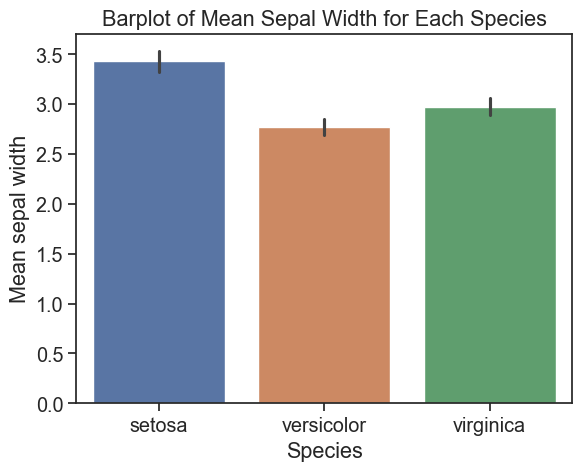

species
setosa        3.428
versicolor    2.770
virginica     2.974
Name: sepal_width, dtype: float64


In [63]:
#set theme for visualization
sns.set_theme(context = 'notebook', style = 'ticks', palette = 'deep', font = 'sans-serif', font_scale = 1.3, color_codes = True, rc = None)

#create bar plot to visualize the mean sepal width across each species
sns.barplot(x = 'species', y = 'sepal_width', data = iris, hue = 'species')

#add labels to graph
plt.xlabel('Species')
plt.ylabel('Mean sepal width')
plt.title('Barplot of Mean Sepal Width for Each Species')
plt.show()

#show numerical value of mean sepal width for each iris species (just for verification purposes)
mean_sepal_width = iris.groupby("species")["sepal_width"].mean()
print(mean_sepal_width)

#3) Is there an association between sepal length and width?

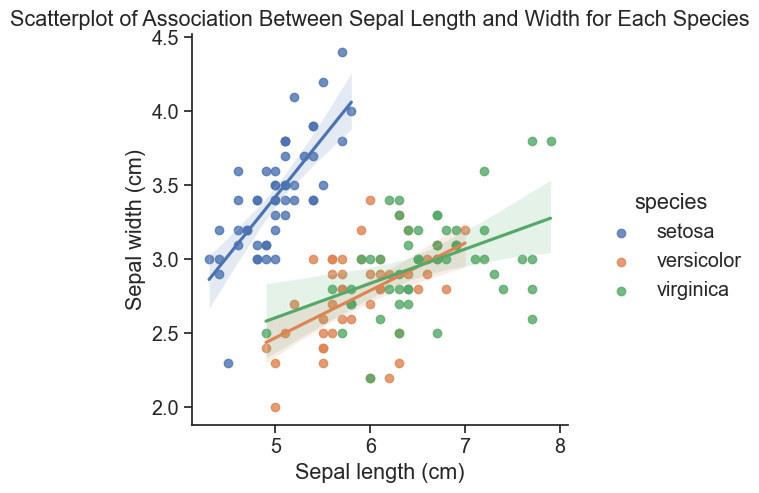

There is a positive association between sepal length and width for each species


In [66]:
#set theme for visualization
sns.set_theme(context = 'notebook', style = 'ticks', palette = 'deep', font = 'sans-serif', font_scale = 1.3, color_codes = True, rc = None)

#create scatterplot to visualize association between sepal length and width across each species
sns.lmplot(x = 'sepal_length', y = 'sepal_width', data = iris, hue = 'species')

#add labels to graph
plt.xlabel('Sepal length (cm)')
plt.ylabel('Sepal width (cm)')
plt.title('Scatterplot of Association Between Sepal Length and Width for Each Species')
plt.show()

#look into using regplot

#print line for results
print('There is a positive association between sepal length and width for each species')

#4) Compare the distributions of petal width for each species.

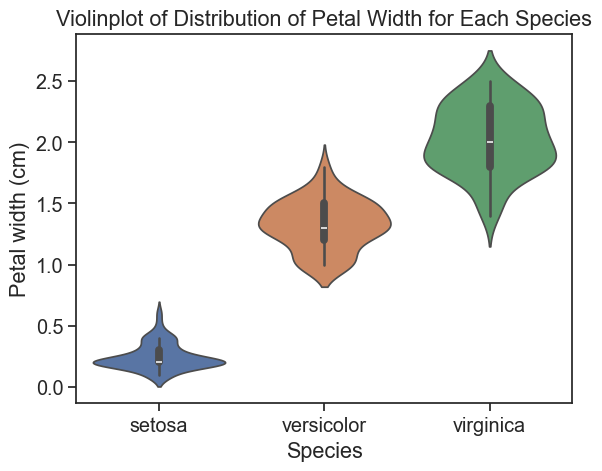

In [69]:
#set theme for visualization
sns.set_theme(context = 'notebook', style = 'ticks', palette = 'deep', font = 'sans-serif', font_scale = 1.3, color_codes = True, rc = None)

#create violinplot to visualize distribution of petal width for each species 
sns.violinplot(x = 'species', y = 'petal_width', data = iris, hue = 'species')

#add labels to graph
plt.xlabel('Species')
plt.ylabel('Petal width (cm)')
plt.title('Violinplot of Distribution of Petal Width for Each Species')
plt.show()

#5) Are there any petal length outliers?

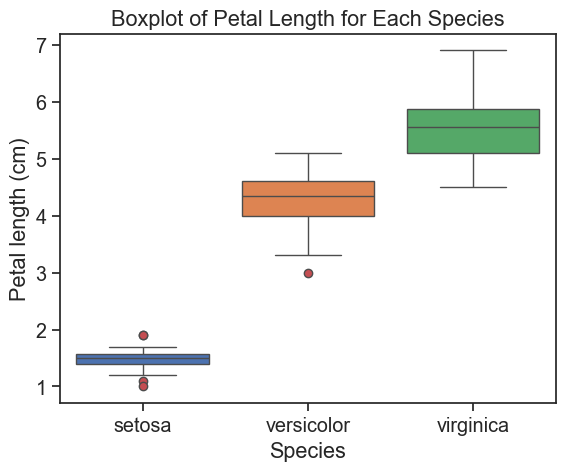

There are 3 outliers in the Setosa species, and 1 outlier in the versicolor species


In [72]:
#set theme for visualization
sns.set_theme(context = 'notebook', style = 'ticks', palette = 'deep', font = 'sans-serif', font_scale = 1.3, color_codes = True, rc = None)

#create boxplot to visualize petal length for each species and find outliers
sns.boxplot(x = 'species', y = 'petal_length', data = iris, hue = 'species',
            saturation = 1.0, flierprops={"markerfacecolor": "r"})

#add labels to graph
plt.xlabel('Species')
plt.ylabel('Petal length (cm)')
plt.title('Boxplot of Petal Length for Each Species')
plt.show()

#print line for results
print('There are 3 outliers in the Setosa species, and 1 outlier in the versicolor species')

#6) Does the association between petal and sepal width change with petal length?

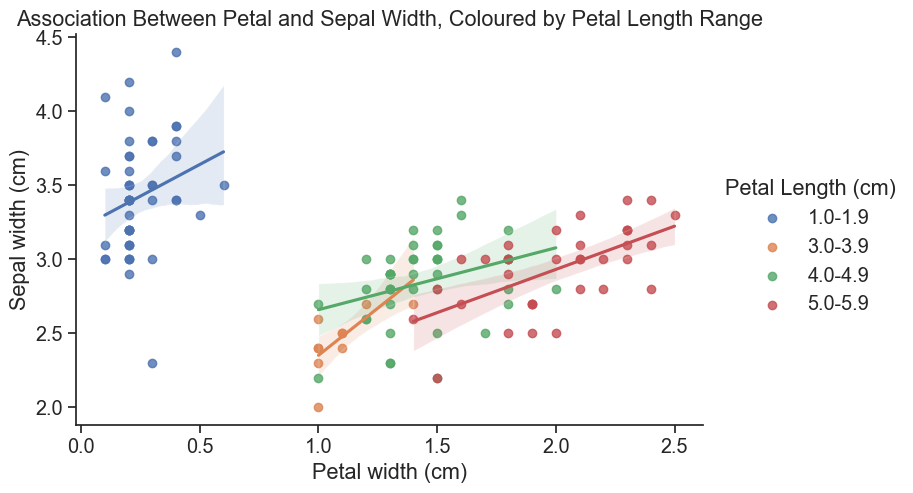

There is a positive association between petal width and sepal width for the given petal length range. This suggests that as petal width increases, sepal width also tends to increase.


In [163]:
#load iris dataset
iris_data = load_iris()
iris = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
iris['species'] = iris_data.target_names[iris_data.target]

#define custom petal length bins, excluding 2.0-2.9
bins = [1.0, 1.9, 3.9, 4.9, 5.9]
labels = ['1.0-1.9', '3.0-3.9', '4.0-4.9', '5.0-5.9']

#create a new column for petal length categories
iris['petal_length_range'] = pd.cut(iris['petal length (cm)'], bins=bins, labels=labels, right=True)

#set the theme for visualization
sns.set_theme(context='notebook', style='ticks', palette='deep', font='sans-serif', font_scale=1.3, color_codes=True)

#create scatter plot with regression line, colored by petal length range
g = sns.lmplot(x='petal width (cm)', y='sepal width (cm)', data=iris, hue='petal_length_range', markers='o', aspect=1.5)

# Change the legend title
g.legend.set_title('Petal Length (cm)')

#add labels and title to the graph
plt.xlabel('Petal width (cm)')
plt.ylabel('Sepal width (cm)')
plt.title('Association Between Petal and Sepal Width, Coloured by Petal Length Range')
plt.show()

#print the results 
print('There is a positive association between petal width and sepal width for the given petal length range. This suggests that as petal width increases, sepal width also tends to increase.')